# Milestone 2 - Group 1041 (Matthew Currie, Jivraj , Livia Jonnatan)

Our Data Set comes from Brett Lantz's book, _Machine Learning with R_. It was created to be used for testing machine learning models and their ability to predict medical costs.

---

## Medical Cost Database Research Questions


<!-- These are coming from the README.md file we have in the main directory -->
1. Does a higher age correlate with higher medical costs?
2. Does having children increase one's medical costs?
3. Do men face higher medical costs than women?
4. Do men with High BMI's face higher medical costs than women with High BMI's?
5. Do medical costs vary with region and sex?
6. How does being a smoker effect your medical costs?



In [1]:
import sys
sys.path.append("../scripts")
from project_functions import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "../../data/raw/Medical_Cost.csv"

In [2]:
# First Load our data
df = load_data(
    PATH
)

---
### Research Question 1: Does a higher age correlate with higher medical costs?

To start our analysis, we will begin by plotting age and medical charges on a scatter plot. This should be able to give us a clear view of what trends may exist within our data, albeit it might look a little messy. 

[Text(0.5, 1.0, 'Distribution of Charges by Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Charges (USD)')]

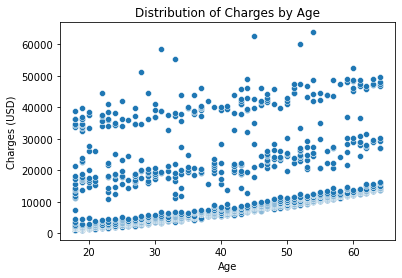

In [4]:
sns.scatterplot(data=df, x='age', y='charges').set(title='Distribution of Charges by Age', xlabel='Age', ylabel='Charges (USD)')

What the above graph illustrates is that, while all ages have cases of high medical costs, there is a linear trend with medical costs rising as one ages. This makes sense intuitively because, as people get older, they become more susceptible certain medical conditions.

Let's break this down into a bar chart to get a better view of the costs as a general average.

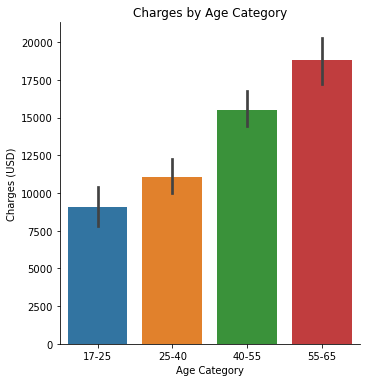

In [5]:
sns.catplot(x='age_category', y='charges', kind='bar', data=df).set(title='Charges by Age Category', xlabel='Age Category', ylabel='Charges (USD)')

And what do you know! The linear trend can be seen again in this bar chart. This further illustrates that as one ages, so does their medical cost.

Let's go back to the scatter plot, but this time let's differentiate which data points are smokers and which are non smokers.

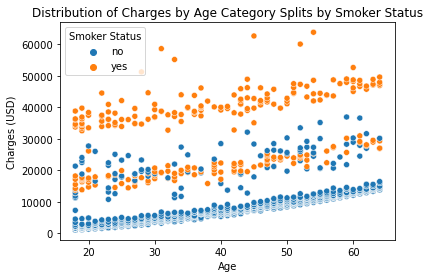

In [7]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker').set(title='Distribution of Charges by Age Category Splits by Smoker Status', xlabel='Age', ylabel='Charges (USD)')
plt.legend(title='Smoker Status')

This plot illustrates that smokers pay significantly more in medical costs. Moreover, it illustrates that, like non smokers, their medical costs rise as they age.

This should also be apparent in a bar chart.

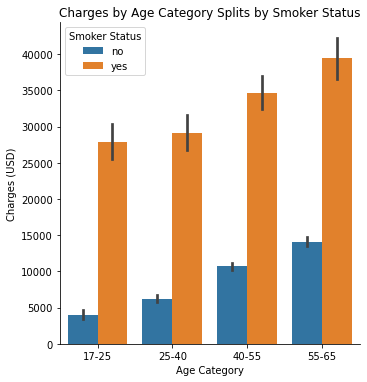

In [12]:
sns.catplot(data=df, x='age_category', y='charges', hue='smoker', kind='bar', legend=False).set(title='Charges by Age Category Splits by Smoker Status', xlabel='Age Category', ylabel='Charges (USD)')
plt.legend(title='Smoker Status')

Yikes! Smoking is not good for you at all! This makes sense since smoking will degrade the persons health as time goes on. We can also see that the barplot shows for both smokers and non smokers a linear relationship in that the lower ages will pay less than those who are 55-65.

Something interesting is that it looks like smokers account for nearly every data point with a high medical cost. Let's return to look deeper into this later, specifically Research Question 6.

---
### Research Question 2: Does having children increase one's medical costs?

Let's start by getting distributions side by side so we can see if there are any rises in costs that correlate from having children.

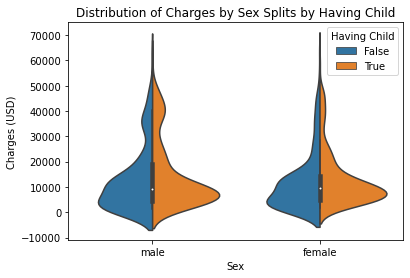

In [14]:
df.loc[df['children'] > 0, 'has_child'] = True
df.loc[df['children'] == 0, 'has_child'] = False

sns.violinplot(data=df, y='charges', x='sex', hue='has_child', split=True).set(title='Distribution of Charges by Sex Splits by Having Child', xlabel='Sex', ylabel='Charges (USD)')
plt.legend(title='Having Child')

Hmm, it seems like having children doesn't seem to play a significant role in one's medical cost. The distribution seems to be ever so slightly shifted towards lower cost, but it is hard to say with confidence that this is due to whether they have had children or not. 

Let's look at a bar plot to see if we notice anything else.

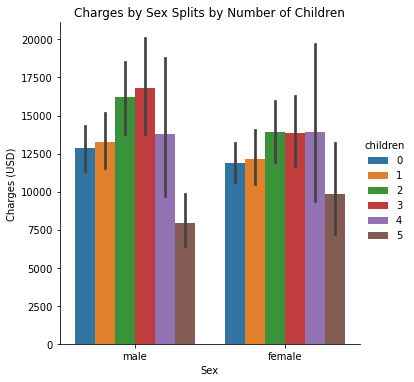

In [18]:
sns.catplot(x="sex", y="charges", hue="children", kind="bar", data=df).set(title='Charges by Sex Splits by Number of Children', xlabel='Sex', ylabel='Charges (USD)')

O interesting! From the looks of it, men seem to have a $3,000 increase in their health costs when they have 3 or 4 chilren. The data on 5 children seems to be weirdly low, let's look at how the ages are distributed among people with children to get a better understanding of what may be going on.

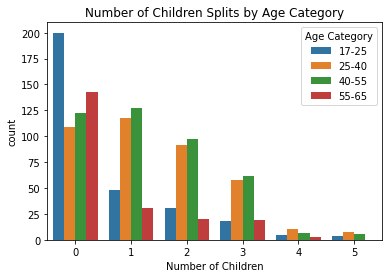

In [21]:
sns.countplot(data=df, x='children', hue='age_category').set(title='Number of Children Splits by Age Category', xlabel='Number of Children')
plt.legend(title='Age Category', loc=1)

That is what I thought would be the case! This graph shows that there are very few young people with children which would lead to an older population. And, as illustrated in our first research question, medical costs grow linearly as one ages.

Another thing our count plot shows is that there is a pretty small sample size for parents with 4 or 5 children which likely resulted in the unusually low average charges displayed in the barplot above.

---
### Research Question 3: Do men face higher medical costs than women?

To begin our analysis, let's see the average medical costs women and men face. This should give us a general view on how medical costs differ between sex.

In [9]:
df.groupby('sex').charges.agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


On average, men have higher medical costs (± 13957) than women (±12570). Even though, it can be seen from the table that women have higher lower and upper bound (± 1608-63770) of medical costs than men (± 1122-62593).

To convince you that it is generally true that men face higher medical costs than women, let's draw a plot.

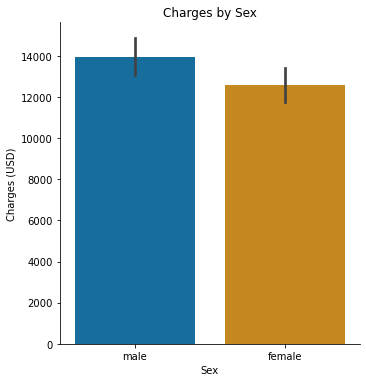

In [22]:
sns.catplot(x='sex', y='charges', kind='bar', data=df, palette='colorblind').set(title='Charges by Sex', xlabel='Sex', ylabel='Charges (USD)')

It is clear that overall, the men have higher medical costs than the women. Now, you might ask how is the distribution of the medical costs for men and women? To answer that, let's look at the following plot.

[Text(0.5, 1.0, 'Distribution of Charges by Sex'),
 Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Charges (USD)')]

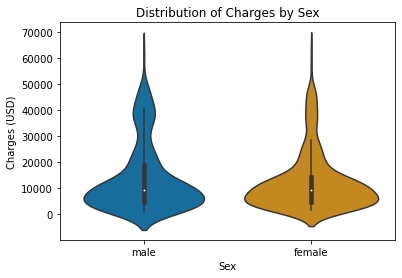

In [23]:
sns.violinplot(x='sex', y='charges', data=df, palette='colorblind').set(title='Distribution of Charges by Sex', xlabel='Sex', ylabel='Charges (USD)')

The violin plot above indicates that men and women have the highest medical costs distribution somewhere below 10000.

Now, let's test what we know from question 1, will sex affect the answer to question 1?

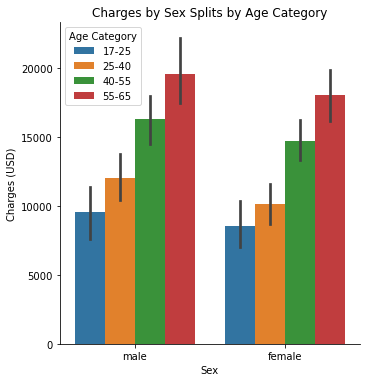

In [25]:
sns.catplot(x='sex', y='charges', hue='age_category', kind='bar', data=df, legend=False).set(title='Charges by Sex Splits by Age Category', xlabel='Sex', ylabel='Charges (USD)')
plt.legend(title='Age Category')

It is no surprise! It can be seen that in general seniors women and men (age 55-65) face the highest medical costs and young women and men (age 17-25) face the lowest medical costs. In both sex categories, it is consistent with the answer in the first research question, that the medical costs increase as the age increases, regardless the sex.

Let's go back to our violin plot and see how is the distribution with age.

[Text(0.5, 1.0, 'Distribution of Charges by Age Category Splits by Sex'),
 Text(0.5, 0, 'Age Category'),
 Text(0, 0.5, 'Charges (USD)')]

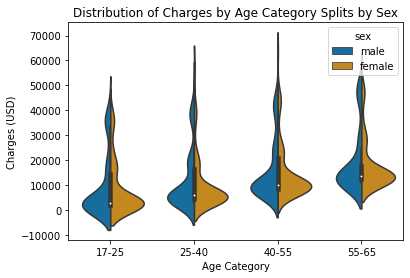

In [26]:
sns.violinplot(x='age_category', y='charges', hue='sex', split=True, data=df, palette='colorblind').set(title='Distribution of Charges by Age Category Splits by Sex', xlabel='Age Category', ylabel='Charges (USD)')

It indicates that generally the distribution is somewhere below \\$10,000. However, for seniors the distribution is above \\$10,000.

---
### Research Question 4: Do men with High BMI's face higher medical costs than women with High BMI's?

To answer this question, let's categorize the BMI into 4 categories, such as *under* for BMI between 10-18.5, *healthy* for BMI between 18.5-25, *over* for BMI between 25-30, and *obese* for BMI between 30-40.

To give us a crystal clear explanation, let's make a plot.

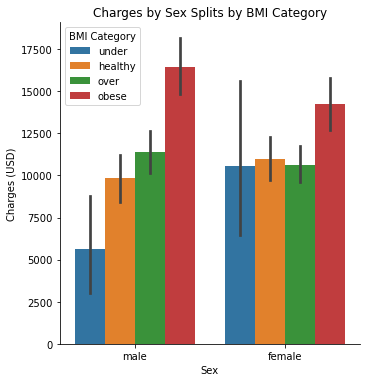

In [29]:
sns.catplot(data=df, x='sex', y='charges', hue='bmi_category', kind='bar', legend=False).set(title='Charges by Sex Splits by BMI Category', xlabel='Sex', ylabel='Charges (USD)')
plt.legend(title='BMI Category')

According to the plot above, it can be seen that for both women and men, those who are categorized as obese, will face the highest medical costs. For women who have BMI ranging from 10-30, they face generally the same amount of medical costs. In contrast, for men, it seems to show a positive relationship between BMI and medical costs. As men's BMI increases, the medical costs increase. That being said, BMI level have effect on men's medical costs, but it does not have effect on women's medical costs. It is surprising, isn't it?

---
### Research Question 5: Do medical costs vary with region and sex?

This dataset divides the region into 4 regions, which are southeast, northeast, southwest, and northwest. Before we dive deep to answer this question, let's see how the medical costs vary with region.

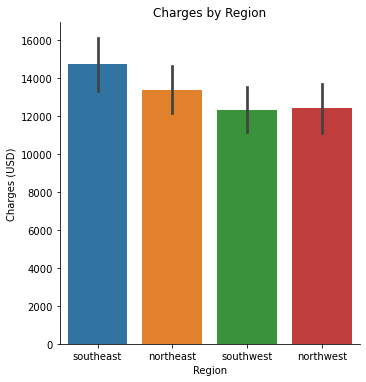

In [30]:
sns.catplot(data=df, x='region', y='charges', kind='bar').set(title='Charges by Region', xlabel='Region', ylabel='Charges (USD)')

This plot indicates that the southeast region have the highest medical costs, while southwest and northwest region have the lowest medical costs. Thus, it can be seen that the medical costs vary with regions.

Let's test this whether this is true when we break this down based on sex.

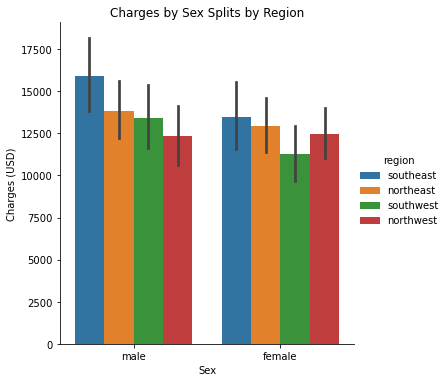

In [31]:
sns.catplot(data=df, x='sex', y='charges', hue='region', kind='bar').set(title='Charges by Sex Splits by Region', xlabel='Sex', ylabel='Charges (USD)')

In this second plot, men and women do not show the same trend. In the male category, men in the southeast have the highest medical costs, and men in the northwest have the lowest medical costs. This is somewhat consistent with what we know before. However, there is no noticeable trend for women in a specific region, except that women in the southwest tend to have a slightly lower medical costs than the other 3 regions. Thus, this is inconsistent with what we indicate before. 

Moreover, if we were to sum this two sex categories, it is clear that the southeast has the highest medical costs, and the southwest and northwest have the lowest medical costs.

---
### Research Question 6: How does being a smoker effect your medical costs?

In this question we explore how smoking will affect the medical expenses of person.

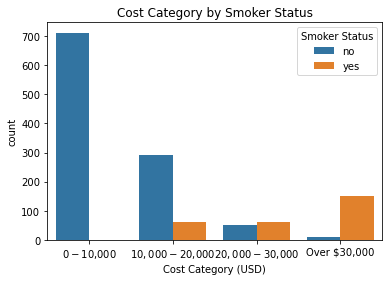

In [32]:
sns.countplot(data=df, x='cost_category', hue='smoker').set(title='Cost Category by Smoker Status', xlabel='Cost Category (USD)')
plt.legend(title='Smoker Status')

This illustrates that virtually all smokers are paying atleast \\$10,000 in their medical costs. Moreover, it illustrates that the majority of non smokers pay significantly less in costs.

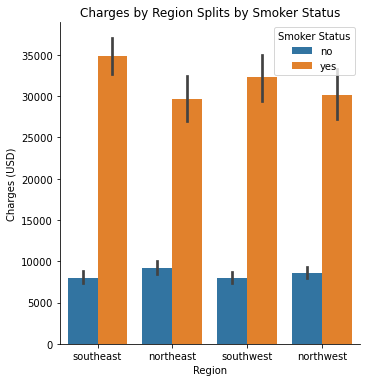

In [35]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df, legend=False).set(title='Charges by Region Splits by Smoker Status', xlabel='Region', ylabel='Charges (USD)')
plt.legend(title='Smoker Status', loc=1)

This barplot represents smokers and non smokers and comparing which has to pay more in medical expenses in respect of their region. What we can gather from this box plot is that it is very evident that smokers have to pay more in medical fees than non smokers. This makes sense since smoking is not a recommended thing to be doing when trying to be healthy. On the other hand, we can see that there is a slight difference accross the board when it comes to each region. From the barplot we can gather that the southeast have to slightly pay more than other regions who have people that smoke. Also, for non smokers it appears that all the regions pay around the same when it comes to the person being a non smoker.  

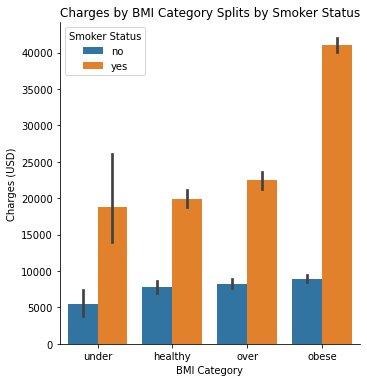

In [37]:
sns.catplot(x='bmi_category', y='charges', hue='smoker', kind='bar', data=df, legend=False).set(title='Charges by BMI Category Splits by Smoker Status', xlabel='BMI Category', ylabel='Charges (USD)')
plt.legend(title='Smoker Status')

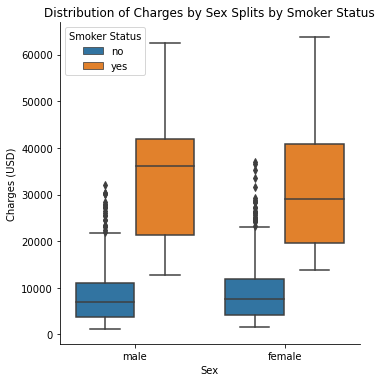

In [40]:
sns.catplot(x="sex", y='charges', hue='smoker', kind='box', data=df, legend=False).set(title='Distribution of Charges by Sex Splits by Smoker Status', xlabel='Sex', ylabel='Charges (USD)')
plt.legend(title='Smoker Status')

In this graph we agian look at how smoking will affect your medical expenses but we look at wether there will be a difference in whether the person is a male or female. From this boxplot it is again evident that smokers do have to pay more in expenses compared to people. But, looking at the comparison between male and female it is shown that both male and female smokers pay more than male and female non smokers. Plus, we can see that there little to no difference in how much males and females that smoke have to pay in medical since both boxes max out near the same constraint. That is also true for males and females that do not smoke.    

We can also look into how bmi and smoking will affect the cost of medical with this pointplot.

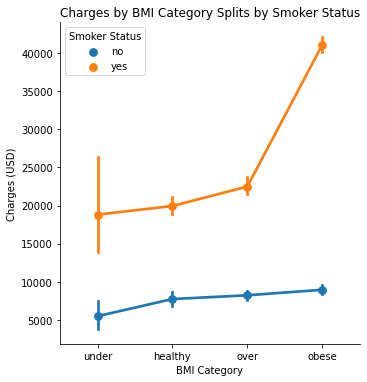

In [42]:
sns.catplot(x="bmi_category", y='charges', hue='smoker', kind='point', data=df, legend=False).set(title='Charges by BMI Category Splits by Smoker Status', xlabel='BMI Category', ylabel='Charges (USD)')
plt.legend(title='Smoker Status')

From this pointplot, we can agian see that the smokers will have to pay more in charges than the non smoker. Also, we can say that if a person is obese and a smoker, they will defintely have to pay more in charges.